# Mini-Project - Regression

##### Student Tags

Author: Anderson Hitoshi Uyekita    
Mini-Project: Support Vector Machine  
Course: Data Science - Foundations II  
COD: ND111  
Date: 19/01/2019    

***

## Table of Contents
- [Introduction](#intro)
- [Given code](#code)
    - [Function](#function)
- [Exercise 1](#exercise_1)
- [Exercise 2](#exercise_2)
- [Exercise 3](#exercise_3)
- [Exercise 4](#exercise_4)
- [Exercise 5](#exercise_5)
- [Exercise 6](#exercise_6)
- [Exercise 7](#exercise_7)
- [Exercise 8](#exercise_8)
- [Exercise 9](#exercise_9)
- [Exercise 10](#exercise_10)

### General Information

This Jupyter Notebook (in Python 2) aims to create a reproducible archive.

## Introduction <a id='intro'></a>

In this project, you will use regression to predict financial data for Enron employees and associates. Once you know some financial data about an employee, like their salary, what would you predict for the size of their bonus?



## Given Code <a id='code'></a>

In [1]:
#!/usr/bin/python

"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    


import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "b"

In [19]:
### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
test_color = "r"

# Import the library of linear model from Scikit Learn.
from sklearn.linear_model import LinearRegression

# Creating a Classifier
reg = LinearRegression()

# Fitting/Training the classifier.
reg.fit(feature_train, target_train)

-1.48499241736851

In [25]:
# Slope
reg.coef_

array([5.44814029])

In [26]:
# Intercept
reg.intercept_ 

-102360.54329387983

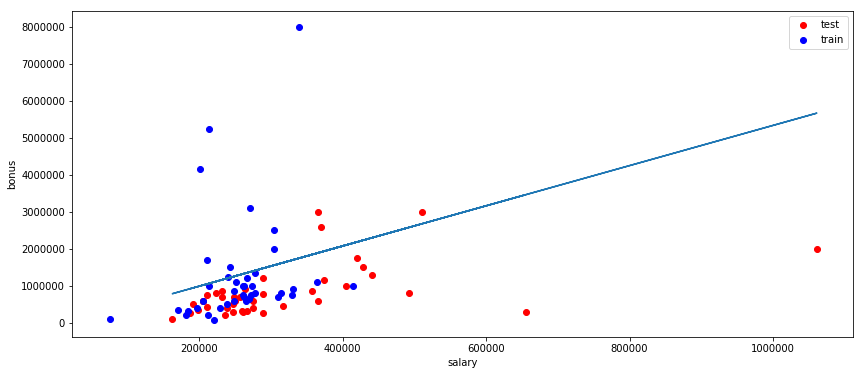

In [24]:
### draw the scatterplot, with color-coded training and testing points
plt.figure(figsize = [14,6])

import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

Run the starter code found in regression/finance_regression.py. This will draw a scatterplot, with all the data points drawn in. 

>**What target are you trying to predict? What is the input feature being used to predict it?**

* target: bonus
* input: salary

Mentally (or better yet, print out the scatterplot and use paper and pencil) sketch out the regression line that you roughly predict.

Import LinearRegression from sklearn, and create/fit your regression. Name it reg so that the plotting code will show it overlaid on the scatterplot. Does it fall approximately where you expected it?

Extract the slope (stored in the reg.coef_ attribute) and the intercept.

>**What are the slope and intercept?**

In [30]:
print "Slope:", reg.coef_
print "Intercept:", reg.intercept_

Slope: [5.44814029]
Intercept: -102360.54329387983


Imagine you were a less savvy machine learner, and didn’t know to test on a holdout test set. Instead, you tested on the same data that you used to train, by comparing the regression predictions to the target values (i.e. bonuses) in the training data. **What score do you find?** You may not have an intuition yet for what a “good” score is; this score isn’t very good (but it could be a lot worse).

>What is the score og the regression on the training data?

In [32]:
# Calculating the r-squared from training dataset
reg.score(feature_train, target_train)

0.04550919269952436

Now compute the score for your regression on the test data, like you know you should.

>**What’s that score on the testing data?**

If you made the mistake of only assessing on the training data, would you overestimate or underestimate the performance of your regression?

In [34]:
# Calculating the r-squared from test dataset
reg.score(feature_test, target_test)

-1.48499241736851

There are lots of finance features available, some of which might be more powerful than others in terms of predicting a person’s bonus. For example, suppose you thought about the data a bit and guess that the “long_term_incentive” feature, which is supposed to reward employees for contributing to the long-term health of the company, might be more closely related to a person’s bonus than their salary is.

A way to confirm that you’re right in this hypothesis is to regress the bonus against the long term incentive, and see if the regression score is significantly higher than regressing the bonus against the salary. **Perform the regression of bonus against long term incentive--what’s the score on the test data?**

>When regressing bonus against the long term incentive, what is the regression score on the test data?

In [40]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

# Creating a Classifier
reg = LinearRegression()

# Fitting/Training the classifier.
reg.fit(feature_train, target_train)

# Calculating the r-squared from test dataset
reg.score(feature_test, target_test)

-0.5927128999498639

If you had to predict someone’s bonus and you could only have one piece of information about them, would you rather know their salary or the long term incentive that they received?

>Is salary or long-term incentive a better feature for predicting someones's bonus?

Long-term incentive.